In [1]:
%pip install agentpy

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Model Design
import agentpy as ap 
import numpy as np 
from boids_model import BoidsModel

# Visualisation
from visualisation import animation_plot, animation_plot_single
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
# Parameter definitions
parameters2D = {
    'size': 50,
    # 'seed': 123,
    'steps': 200,
    'ndim': 2,
    'population': 200,
    'inner_radius': 3,
    'outer_radius': 10,
    'border_distance': 10,
    'cohesion_strength': 0.005,
    'seperation_strength': 0.1,
    'alignment_strength': 0.3,
    'border_strength': 0.5
}

model = BoidsModel(parameters2D)
results = model.run()

Completed: 200 steps
Run time: 0:00:11.245523
Simulation finished


In [29]:
results

DataDict {
'info': Dictionary with 9 keys
'parameters': 
    'constants': Dictionary with 11 keys
'variables': 
    'BoidsModel': DataFrame with 200 variables and 201 rows
'reporters': DataFrame with 1 variable and 1 row
}

In [30]:
results.variables.BoidsModel.head(-1)

,agent 0,agent 1,agent 2,agent 3,agent 4,agent 5,agent 6,agent 7,agent 8,agent 9,...,agent 190,agent 191,agent 192,agent 193,agent 194,agent 195,agent 196,agent 197,agent 198,agent 199
t,,,,,,,,,,,,,,,,,,,,,
0,"[41.344405168391404, 10.13340741144802]","[25.065188848509486, 15.59906890877495]","[31.491261505393204, 40.654808267963745]","[43.135688471132546, 24.388374379644347]","[45.56868276403606, 47.60271466587094]","[1.9057551557119357, 4.754514608531446]","[1.0928368585839843, 28.130515787704134]","[31.33895101127991, 2.722270311602737]","[48.96911760798283, 1.8579250420849902]","[30.420709148336165, 7.753895079289147]",...,"[19.06641597948237, 32.006927820150835]","[16.133890075116362, 41.15571628823943]","[1.8837075502590728, 37.98845177660834]","[2.8831543860202427, 45.560976505389284]","[31.880661479268667, 30.764994650588434]","[18.146819264556598, 33.99320652969853]","[45.90703992407084, 24.833196328428492]","[16.063787951280773, 13.805594499911017]","[45.24488516057095, 2.3112192940084544]","[0.5072010282299033, 49.070732030256394]"
1,"[40.64558414557174, 9.418110844935029]","[25.120564448970104, 16.59753450301124]","[32.4210443003393, 40.28669965053918]","[42.69268362691085, 23.491855161782226]","[44.663956014238714, 47.176722285421334]","[2.6019538606741337, 4.0366654856588475]","[2.0878039964754502, 28.03031401867751]","[31.929281794678825, 1.9151088865013983]","[47.995189681520415, 1.6310673905574018]","[31.15287888258707, 8.435017300514499]",...,"[18.253494492081654, 32.58930111566]","[16.937962853435515, 41.75024716814906]","[2.591108247263486, 37.28163903345944]","[2.675434572026254, 44.582788139646624]","[32.725641302853404, 30.230196466471558]","[17.71773257294668, 34.89646984185244]","[45.182810993374666, 24.143636718283958]","[16.4116097346849, 14.743155168342437]","[44.534753416107186, 1.6071504724399615]","[1.008716751431032, 48.20558350001315]"
2,"[39.64623642340856, 9.45422358793895]","[25.601901523071458, 17.474070081921504]","[32.973798896855364, 39.453355570323595]","[41.71645362727412, 23.275118021888602]","[43.868255036666916, 46.57103263362655]","[3.6018081290627073, 4.053737157666907]","[3.0661246974439846, 27.823218373970928]","[32.90809408835695, 2.1198684863851986]","[47.04727353951287, 1.9495873863528463]","[31.997684727586687, 8.970090271476856]",...,"[17.271830020784588, 32.779918181509444]","[17.928866096834426, 41.61567093614089]","[3.333771962947865, 36.611974486536226]","[2.872147662914754, 43.602327044103774]","[33.635255804981824, 29.81474315078174]","[17.569311285112082, 35.885394066107025]","[44.21291866144033, 23.900102604749588]","[16.61687857088365, 15.721860795630649]","[43.53795029395259, 1.527253440812699]","[1.6168272861725332, 47.41173113493737]"
3,"[39.10032182434522, 10.292064414426603]","[26.425127620446123, 18.041783735624918]","[33.1032793120151, 38.461773590813046]","[40.72145475705691, 23.37500419844211]","[43.18707870282936, 45.83891324293974]","[4.5138568714243235, 4.463818968476159]","[3.991895395769442, 27.445132915215908]","[33.507126381675384, 2.920593352716735]","[46.19483155942736, 2.472409220812628]","[32.75391735779559, 9.624393113444796]",...,"[16.283948954889755, 32.62470542544059]","[18.457044671352264, 40.76653761715011]","[4.1922469962778, 36.09911912958929]","[3.086918901508702, 42.62566266210102]","[34.614006383433185, 29.60968875511776]","[17.101881617377398, 36.76942432900612]","[43.21337567618579, 23.869873138521168]","[17.212333681451508, 16.525249376143602]","[42.63255104969625, 1.9518146360484874]","[2.191828944655994, 46.593578891928]"
4,"[38.834437554123916, 11.256069370248348]","[27.346514279813906, 18.43043090715595]","[32.85193822493458, 37.49387501247687]","[39.7789226382436, 23.7091197548074]","[42.680723150695336, 44.976588446344486]","[5.301542109947898, 5.079896857230542]","[4.8932811645273695, 27.012115945709308]","[33.80511893425225, 3.8751615475612553]","[45.41576905573247, 3.099355482733581]","[33.438374201382395, 10.3534464923322

[21.26768971864347, 16.47006373702679]
[22.168529925395287, 23.668800897697754]


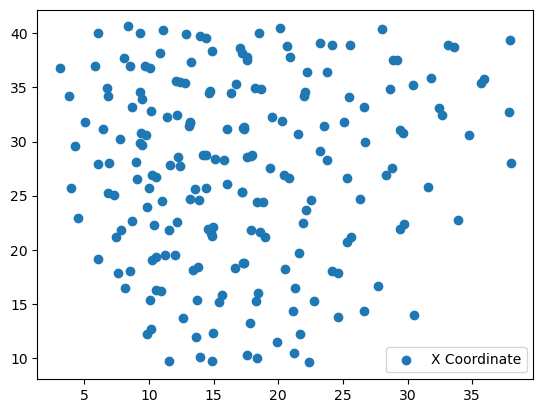

In [31]:
agent_data = results.variables.BoidsModel.iloc[-1]
print(agent_data[0])
print(agent_data[1])

# Separate the x and y coordinates
x_coords = [pos[0] for pos in agent_data]
y_coords = [pos[1] for pos in agent_data]

# Create a new figure
plt.figure()

# Plot the x and y coordinates
plt.scatter(x_coords, y_coords, label='X Coordinate')
# plt.plot(y_coords, label='Y Coordinate')

# Add a legend
plt.legend()

# Show the plot
plt.show()

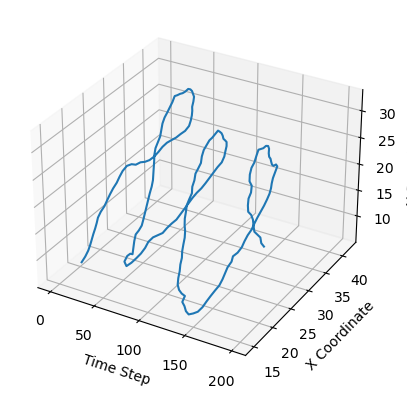

In [14]:
agent_data = results.variables.BoidsModel['agent 0']

# Separate the x and y coordinates
x_coords = [pos[0] for pos in agent_data]
y_coords = [pos[1] for pos in agent_data]

# Create a list of time steps
time_steps = list(range(len(agent_data)))

# Create a new figure
fig = plt.figure()

# Create a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the x, y coordinates and time steps
ax.plot(time_steps, x_coords, y_coords)

# Set the labels
ax.set_xlabel('Time Step')
ax.set_ylabel('X Coordinate')
ax.set_zlabel('Y Coordinate')

# Show the plot
plt.show()

In [ ]:
animation_plot(BoidsModel, parameters2D)